In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from general_graph_utils import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Quick test of pipeline

In [37]:
G, G_ud = random_graph(n=6)

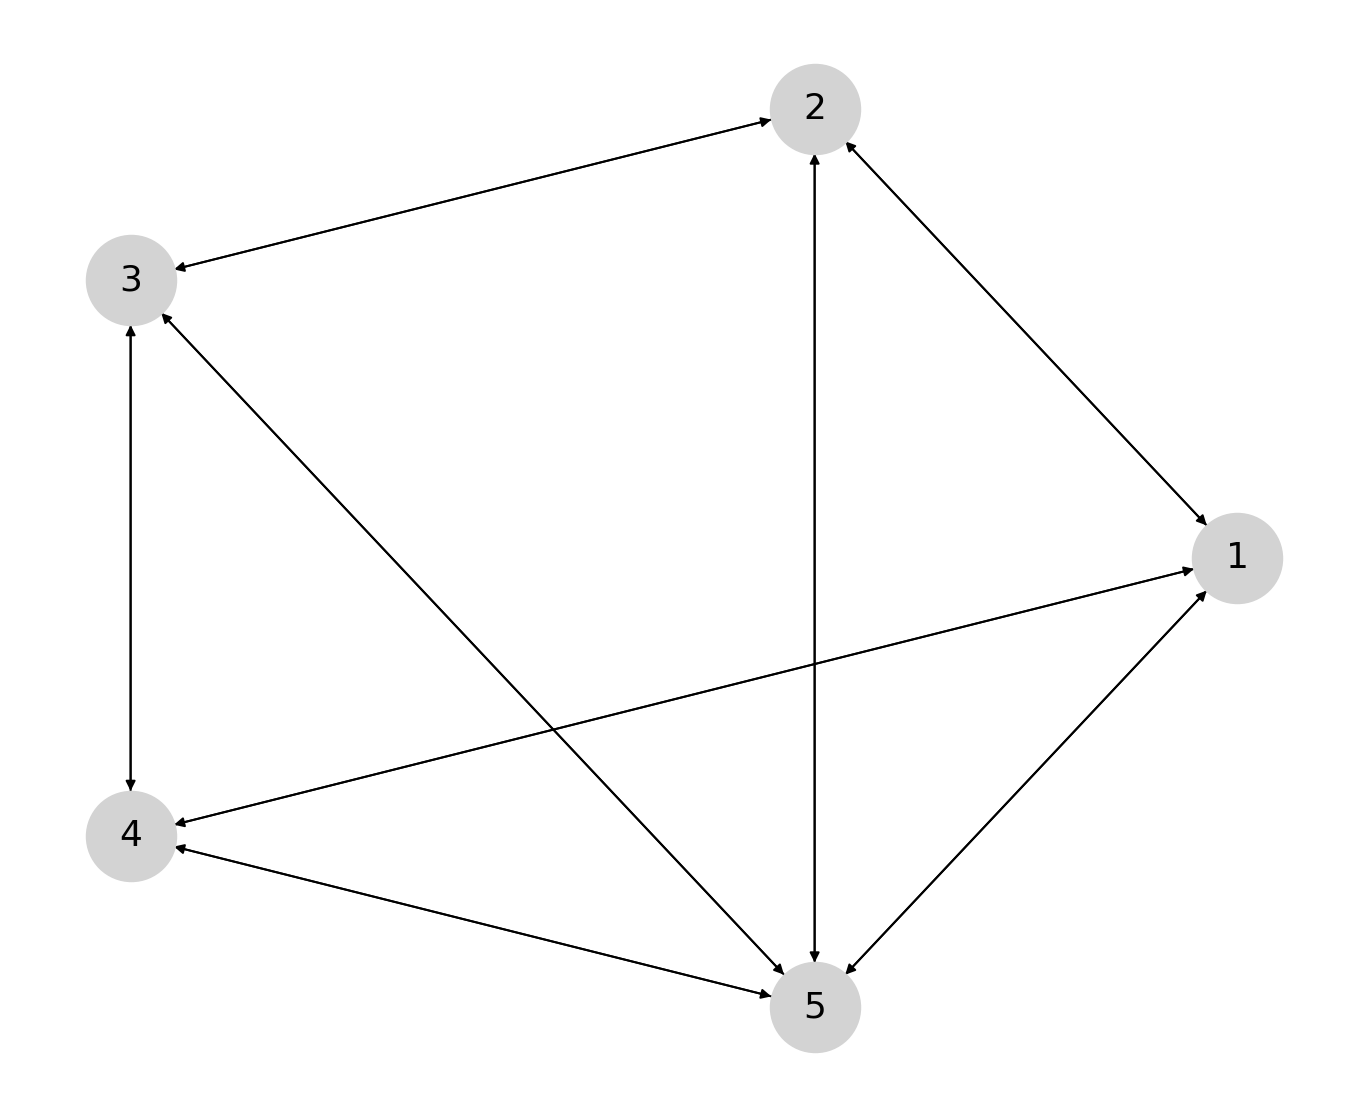

In [38]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [39]:
node_list = get_nodes(G)
num_nodes = len(node_list)
print(node_list)

[1 2 3 4 5]


In [40]:
edge_list = get_edges(G)
print(edge_list)

[[1 5]
 [1 2]
 [1 4]
 [2 1]
 [2 3]
 [2 5]
 [3 4]
 [3 5]
 [3 2]
 [4 3]
 [4 1]
 [4 5]
 [5 3]
 [5 4]
 [5 2]
 [5 1]]


In [41]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[5, 4, 1], [5, 3, 4], [2, 3, 4, 1], [2, 5, 1]]


In [42]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 5): 0.00184, (1, 2): 1.42018, (1, 4): 0.0015, (2, 1): 0.16487, (2, 3): 24.60754, (2, 5): 1.53079, (3, 4): 852.54926, (3, 5): 0.02494, (3, 2): 0.00102, (4, 3): 0.01564, (4, 1): 0.10366, (4, 5): 0.37336, (5, 3): 3.25345, (5, 4): 131.98933, (5, 2): 0.00303, (5, 1): 0.05559}
[1.8400000e-03 1.4201800e+00 1.5000000e-03 1.6487000e-01 2.4607540e+01
 1.5307900e+00 8.5254926e+02 2.4940000e-02 1.0200000e-03 1.5640000e-02
 1.0366000e-01 3.7336000e-01 3.2534500e+00 1.3198933e+02 3.0300000e-03
 5.5590000e-02]


In [43]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [44]:
cycle_edges_backward

[[(4, 5), (1, 4), (5, 1)],
 [(3, 5), (4, 3), (5, 4)],
 [(3, 2), (4, 3), (1, 4), (2, 1)],
 [(5, 2), (1, 5), (2, 1)]]

In [45]:
cycle_edges_forward

[[(5, 4), (4, 1), (1, 5)],
 [(5, 3), (3, 4), (4, 5)],
 [(2, 3), (3, 4), (4, 1), (1, 2)],
 [(2, 5), (5, 1), (1, 2)]]

In [46]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [47]:
cycle_labels_forward

[[0.16322500608175555, 0.10366000000000002, 0.0018399999999999996],
 [0.00016174272381321763, 852.5492599999999, 0.37336],
 [3.143371700217978e-11, 852.54926, 0.10366, 1.42018],
 [1.1642922941663704e-05, 0.05559000000000001, 1.42018]]

In [48]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-2.17653586e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [49]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

# Making new functions

In [59]:
N = 4

In [57]:
G, G_ud = random_graph_n(N)

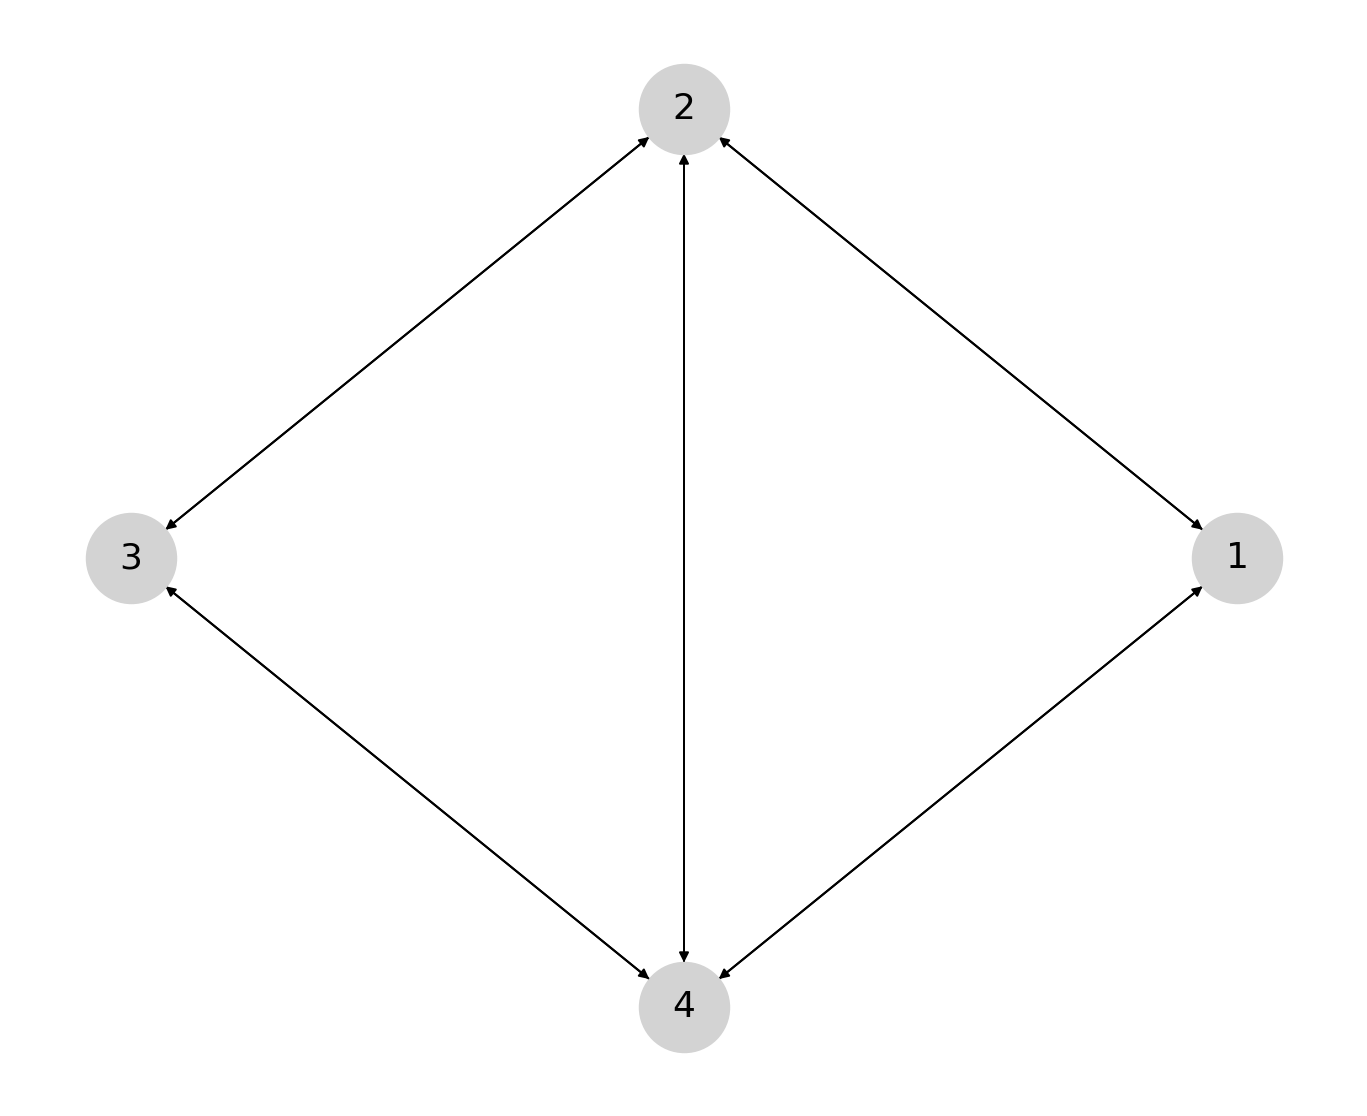

In [58]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [60]:
node_list = get_nodes(G)
num_nodes = N
edge_list = get_edges(G)
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)

In [61]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 2): 125.8382, (1, 4): 0.18749, (2, 1): 0.00418, (2, 4): 2.42614, (2, 3): 0.14873, (3, 2): 54.78332, (3, 4): 87.3242, (4, 3): 111.47199, (4, 1): 26.05348, (4, 2): 3.73894}
[1.2583820e+02 1.8749000e-01 4.1800000e-03 2.4261400e+00 1.4873000e-01
 5.4783320e+01 8.7324200e+01 1.1147199e+02 2.6053480e+01 3.7389400e+00]
